# DSCI 303 - Homework 05
### Lauren Forti

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 1: Sample Mean and Variance

In [2]:
x = np.array([10, 16, 26, 12, 17, 22, 14, 12, 21, 16])

# get array length
n = len(x)

# calc mean
mean = 1/n * np.sum(x)

# calc variance
diff = (x - mean)
var = 1/(n-1)*np.sum(diff**2)

# output results
print(f'Sample Mean: {mean:>8}')
print(f'Sample Variance: {var:>.1f}')

Sample Mean:     16.6
Sample Variance: 25.6


In [3]:
# get numpy to calc mean and var
mean_np = np.mean(x)
var_np = np.var(x, ddof = 1)

# output results
print(f'Sample Mean: {mean_np:>8}')
print(f'Sample Variance: {var_np:>.1f}')

Sample Mean:     16.6
Sample Variance: 25.6


## Problem 2: Scoring a Regression Model

In [4]:
# calculate SSE score
def find_sse(true_y, pred_y):
    squares = (true_y - pred_y)**2
    sse = np.sum(squares)
    return sse

In [5]:
true_y = np.array([22.1, 17.9, 16.5, 14.3, 19.8, 23.7, 22.0, 18.4, 25.7, 19.2])
pred_1 = np.array([21.4, 16.7, 17.9, 12.1, 22.1, 25.1, 21.7, 19.3, 23.4, 19.9])
pred_2 = np.array([20.7, 18.1, 16.9, 13.6, 21.9, 24.8, 20.3, 21.1, 24.8, 18.4])

# calc SSE score for two sets of predicted y values
sse_1 = find_sse(true_y, pred_1)
sse_2 = find_sse(true_y, pred_2)

# output results
print(f'Model 1 SSE: {sse_1:.2f}')
print(f'Model 2 SSE: {sse_2:.2f}')

Model 1 SSE: 22.66
Model 2 SSE: 19.90


## Problem 3: Scoring a Classification Model

In [6]:
def find_accuracy(true_y, pred_y):
    # get total # of observations
    length = len(true_y)
    # get # of correct
    correct = np.sum(true_y == pred_y)
    # calc accuracy
    accuracy = correct/length
    return accuracy

In [7]:
true_diag = np.array(['P', 'P', 'N', 'N', 'P', 'N', 'N', 'N', 'P', 'N', 'N', 'N', 'N', 'P', 'P', 'N', 'N',
'N', 'N', 'N'])
pred_diag = np.array(['N', 'P', 'N', 'P', 'P', 'N', 'P', 'N', 'P', 'N', 'N', 'N', 'P', 'P', 'P', 'N', 'N',
'N', 'P', 'N'])

# calc accuracy for correct diagnoses
diag_acc = find_accuracy(true_diag, pred_diag)
print(f'Model Accuracy: {diag_acc}')

Model Accuracy: 0.75


In [8]:
true_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'])
pred_labels = np.array(['dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat',
'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat'])


# calc accuracy for correct labels
img_acc = find_accuracy(true_labels, pred_labels)
print(f'Model Accuracy: {img_acc}')

Model Accuracy: 0.875


## Problem 4: Classification Report

In [9]:
def classification_report(true_y, pred_y):
    # get the two classes
    classes = np.unique(true_y)
    # get # of items in classes
    p_class = np.sum(true_y == classes[1])
    n_class = np.sum(true_y == classes[0])
    
    # get model accuracy
    acc = find_accuracy(true_y, pred_y)
    
    # calc observations
    TP = np.sum((pred_y == classes[1]) & (true_y == classes[1]))
    FP = np.sum((pred_y == classes[1]) & (true_y == classes[0]))
    TN = np.sum((pred_y == classes[0]) & (true_y == classes[0]))
    FN = np.sum((pred_y == classes[0]) & (true_y == classes[1]))

    # calc scores
    p_precision = TP/(TP+FP)
    p_recall = TP/(TP+FN)
    n_precision = TN/(TN+FN)
    n_recall = TN/(TN+FP)
    
    # output results
    print(f'Positive Class: {classes[1]:>10}')
    print(f'Negative Class: {classes[0]:>10}')
    print('')
    print(f'Accuracy: {acc:>16.4f}')
    print(f'Positive Precision: {p_precision:.4f}')
    print(f'Positive Recall: {p_recall:>9.4f}')
    print(f'Negative Precision: {n_precision:.4f}')
    print(f'Negative Recall: {n_recall:>9.4f}\n')

In [10]:
# calc accuracy for correct diagnoses
classification_report(true_diag, pred_diag)

# calc accuracy for correct labels
classification_report(true_labels, pred_labels)

Positive Class:          P
Negative Class:          N

Accuracy:           0.7500
Positive Precision: 0.5556
Positive Recall:    0.8333
Negative Precision: 0.9091
Negative Recall:    0.7143

Positive Class:        dog
Negative Class:        cat

Accuracy:           0.8750
Positive Precision: 0.8333
Positive Recall:    0.9091
Negative Precision: 0.9167
Negative Recall:    0.8462



## Problem 5: Transformation of Random Variables

In [11]:
np.random.seed(1)

# sampling 25000 values from normal dist w/ a mean of 0 and std dev of 0.4
X = np.random.normal(loc=0, scale=0.4, size=25000)
Y = np.exp(X)

# get mean and std dev of X
X_mean = np.mean(X) 
X_std = np.std(X, ddof=1)
# get mean and std dev of Y
Y_mean = np.mean(Y) 
Y_std = np.std(Y, ddof=1)

# output results
print(f'Sample Mean of X: {X_mean:>9.4f}')
print(f'Sample Std Dev of X: {X_mean:.4f}')
print(f'Sample Mean of Y: {Y_mean:>9.4f}')
print(f'Sample Std Dev of Y: {Y_mean:.4f}')

Sample Mean of X:    0.0025
Sample Std Dev of X: 0.0025
Sample Mean of Y:    1.0862
Sample Std Dev of Y: 1.0862


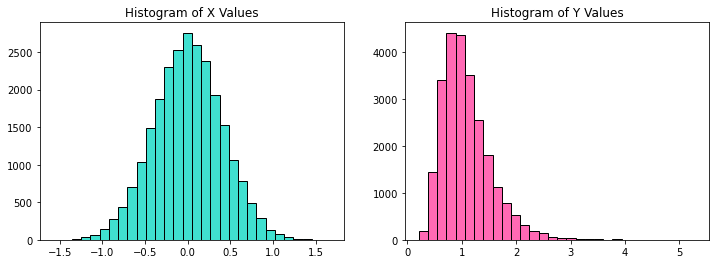

In [12]:
plt.figure(figsize=[12, 4])

# plot X
plt.subplot(1, 2, 1)
plt.hist(X, edgecolor='k', 
         color='turquoise', 
         bins=30)
plt.title('Histogram of X Values')

# plot Y
plt.subplot(1, 2, 2)
plt.hist(Y, edgecolor='k', 
         color='hotpink', 
         bins=30)
plt.title('Histogram of Y Values')

plt.show()

In [13]:
# prob that Y is less than 0.5
Y_5 = np.mean(Y<.5)

# prob that Y is less than 1.0
Y_1 = np.mean(Y<1.0)

# prob that Y is less than 2.0
Y_2 = np.mean(Y<2.0)

# output results
print(f'Probability that Y is less than 0.5: {Y_5:>4.4f}')
print(f'Probability that Y is less than 1.0: {Y_1:>4.4f}')
print(f'Probability that Y is less than 2.0: {Y_2:>4.4f}')

Probability that Y is less than 0.5: 0.0410
Probability that Y is less than 1.0: 0.4969
Probability that Y is less than 2.0: 0.9574


## Problem 6: Stochastic Linear Relationships

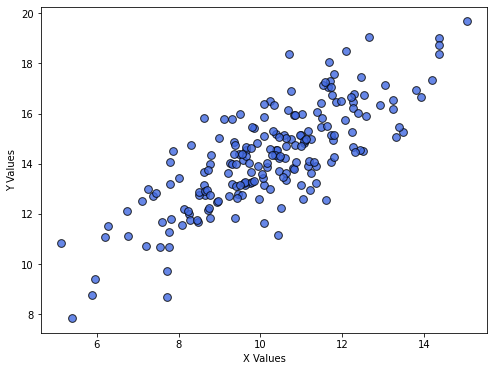

In [14]:
np.random.seed(1)

# sampling 200 values from normal dist w/ a mean of 10 and std dev of 2
x_vals = np.random.normal(loc=10, scale=2, size=200)
# sampling 200 values from normal dist w/ a mean of 0 and std dev of 1.2
errors = np.random.normal(loc=0, scale=1.2, size=200)

# stochastic linear relationship
y_vals = np.array([5.1 + .9*x_vals + errors])

# plot x against y
plt.figure(figsize=[8,6])
plt.scatter(x=x_vals,
            y=y_vals,
            s=60,
            alpha=0.8, 
            color='royalblue',
            edgecolor='black')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.show()

In [15]:
# calc correlation
diff_x = (x_vals - np.mean(x_vals))
diff_y = (y_vals - np.mean(y_vals))
numerator = np.sum(diff_x*diff_y)
denominator = math.sqrt((np.sum(diff_x**2))*(np.sum(diff_y**2)))

r = numerator/denominator

# output results
print(f'Correlation between X and Y: {r:.4f}')

Correlation between X and Y: 0.7861


## Problem 7: Relationship between Life Expectancy and Per Capita GDP

In [16]:
import pandas as pd
df = pd.read_csv('gapminder_data.txt', sep='\t')
country = df.country.values
year = df.year.values
continent = df.continent.values
population = df.population.values
life_exp = df.life_exp.values
pcgdp = df.gdp_per_cap.values
gini = df.gini.values
df = None

In [17]:
continent_list = ['africa', 'americas', 'asia', 'europe']
color_list = ['orangered', 'gold', 'dodgerblue', 'mediumorchid']

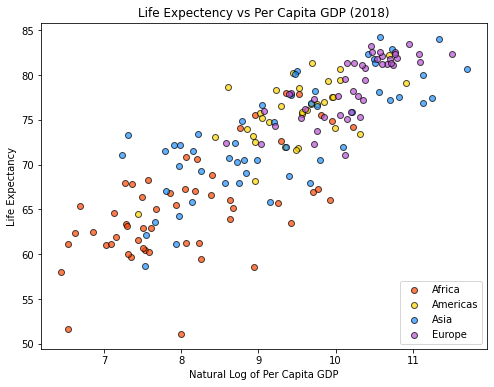

In [18]:
plt.figure(figsize=[8,6])

i = 0
for ct in continent_list:    
    # indicate which elements correspond to the current continent and the year 2018.
    sel = pcgdp[(continent == ct) & (year == 2018)], life_exp[(continent == ct) & (year == 2018)]
    # get ln of GDP
    ln_pcgdp = np.log(sel[0])

    # make scatter plot
    plt.scatter(x=ln_pcgdp, 
                y=sel[1], 
                alpha=0.7, 
                color=color_list[i],
                edgecolor='black',
                label=ct.capitalize())
    i += 1

# add labels
plt.xlabel('Natural Log of Per Capita GDP')
plt.ylabel('Life Expectancy')
plt.title('Life Expectency vs Per Capita GDP (2018)')

# add legend
plt.legend(loc='lower right')

plt.show()

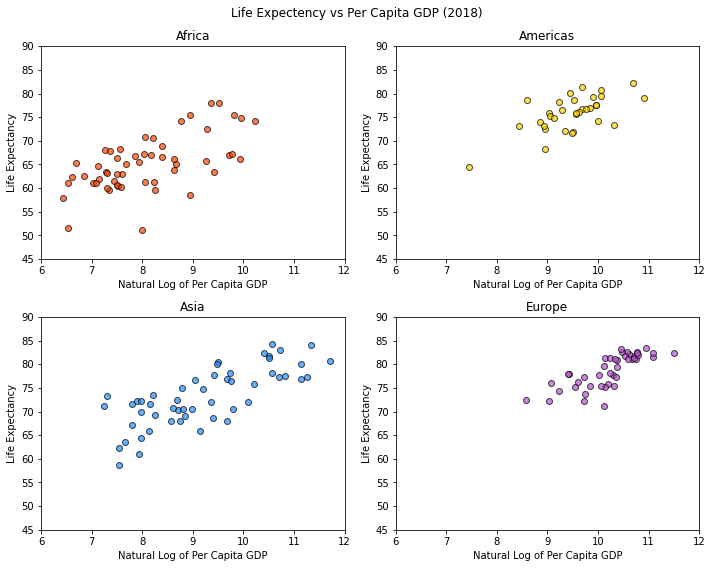

In [19]:
plt.figure(figsize=[10,8])
plt.suptitle('Life Expectency vs Per Capita GDP (2018)')

i = 0
sel = 0
for ct in continent_list:    
    # indicate which elements correspond to the current continent and the year 2018.
    sel = pcgdp[(continent == ct) & (year == 2018)], life_exp[(continent == ct) & (year == 2018)]
    # get ln of GDP
    ln_pcgdp = np.log(sel[0])

    # make scatter plot
    plt.subplot(2,2,i+1)
    plt.scatter(x=ln_pcgdp, 
                y=sel[1], 
                alpha=0.7, 
                color=color_list[i],
                edgecolor='black')
    
    # add axes limits
    plt.xlim([6, 12])
    plt.ylim([45, 90])
    
    # add labels
    plt.xlabel('Natural Log of Per Capita GDP')
    plt.ylabel('Life Expectancy')
    plt.title(ct.capitalize())
    i += 1

plt.tight_layout()
plt.show()

## Problem 8: Trends by Country

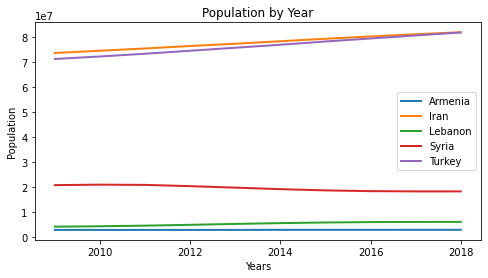

In [20]:
ct_list = ['Armenia', 'Iran', 'Lebanon', 'Syria', 'Turkey']
year_range = range(2009, 2019)

plt.figure(figsize=[8,4])

sel = 0
for ct in ct_list:    
    # get elements corresponding to the current country and year range
    sel = population[(country == ct) & (np.in1d(year, year_range))]
    # draw line
    plt.plot(year_range, sel, lw=2, label=ct)

# add legend
plt.legend()

# add labels
plt.xlabel('Years')
plt.ylabel('Population')
plt.title('Population by Year')

plt.show()

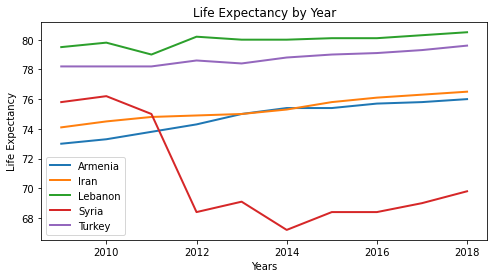

In [21]:
plt.figure(figsize=[8,4])

sel = 0
for ct in ct_list:    
    # get elements corresponding to the current country and year range
    sel = life_exp[(country == ct) & (np.in1d(year, year_range))]
    # draw line
    plt.plot(year_range, sel, lw=2, label=ct)

# add legend
plt.legend()

# add labels
plt.xlabel('Years')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year')

plt.show()